In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("advertising.csv")
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
#removing unwanted data(column)
data.drop("Unnamed: 0", axis=1, inplace=True)

In [6]:
data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [7]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [46]:
#collecting data
x = data["TV"].values
x.shape
y = data["sales"].values
y.shape

(200,)

In [11]:
#calculating coefficients
#mean of x and y
mean_x = np.mean(x)
print(mean_x)
mean_y = np.mean(y)
print(mean_y)

147.0425
14.0225


In [12]:
n=len(x)
n

200

In [19]:
#y=c+mx
numer=0
denom=0
for i in range(n):
    numer += (x[i]-mean_x)*(y[i]-mean_y)
    denom += (x[i]-mean_x)**2
m=numer/denom
c=mean_y-(m*mean_x)
print(m,c)

0.04753664043301969 7.032593549127704


In [20]:
print("The linear equation is : y = {:.4}x+{:.5}".format(m,c))

The linear equation is : y = 0.04754x+7.0326


396.4 -99.3


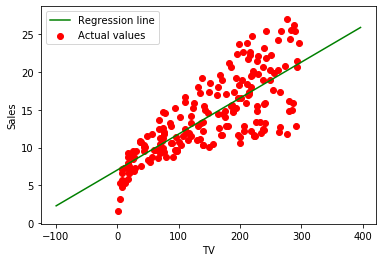

In [29]:
#plotting vales and regression line
max_x=np.max(x)+100
min_x=np.min(x)-100
print(max_x,min_x)
x1=np.linspace(min_x,max_x,1000)
y1=m*x1+c
plt.plot(x1,y1,color="green",label="Regression line")
plt.scatter(x,y,color="red",label="Actual values")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend(loc="best")
plt.show()

In [30]:
y_pred=c+m*x[2]
y_pred

7.8502237645756425

In [33]:
#determination coefficient(R**2) --(0 to 1 range)
ss_tot=0
ss_res=0
for i in range(n):
    y_pred=c+m*x[i]
    ss_res+=(y[i]-y_pred)**2
    ss_tot+=(y[i]-mean_y)**2
r2=1-(ss_res/ss_tot)
print(r2)

0.6118750508500708


In [51]:
#using sklearn
from sklearn.linear_model import LinearRegression
x1 = data["TV"].values.reshape(-1,1)
y1 = data["sales"].values.reshape(-1,1)
reg=LinearRegression() 
reg.fit(x1,y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
print(reg.coef_)
print(reg.intercept_)

[[0.04753664]]
[7.03259355]


In [44]:
reg.predict([[230.1]])

array([[17.97077451]])

In [45]:
p=reg.predict(x1)
p

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232],
       [ 9.76595037],
       [12.74649773],
       [ 7.44140866],
       [16.53041431],
       [10.17476548],
       [17.23871025],
       [ 8.16396559],
       [11.66741599],
       [16.73482186],
       [16.32125309],
       [10.25557777],
       [20.40940417],
       [10.32212907],
       [14.03474068],
       [17.41459582],
       [18.31779199],
       [ 7.6600772 ],
       [17.88520856],
       [ 9.99412625],
       [19.52997632],
       [13.82557947],
       [18.44614092],
       [18.85970969],
       [10.38868036],
       [20.95607553],
       [12.39948025],
       [11.653155  ],
       [19.65832525],
       [11.58185004],
       [20.85149492],
       [19.72012288],
       [10.58358059],
       [ 9.08142275],
       [17.87094757],
       [16.65876324],
       [15.44657891],
       [20.98935118],
       [16.86792445],
       [ 8.22576322],
       [15

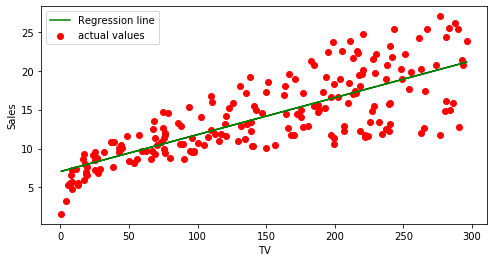

In [53]:
plt.figure(figsize=(8,4))
plt.scatter(data["TV"],data["sales"],c="red",label="actual values")
plt.plot(data["TV"],p,c="green",label="Regression line")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend(loc="best")
plt.show()

In [55]:
r2 = reg.score(x1,y1)
r2

0.611875050850071

In [56]:
data1 = pd.read_csv("https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Regression/headbrain.csv")
data1.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [65]:
data1.isna().sum()

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

In [68]:
from sklearn.linear_model import LinearRegression
x2= data1["Head Size(cm^3)"].values.reshape(-1,1)
y2= data1["Brain Weight(grams)"].values.reshape(-1,1)
r=LinearRegression()
r.fit(x2,y2)
r.predict([[4512]])
p=r.predict(x2)

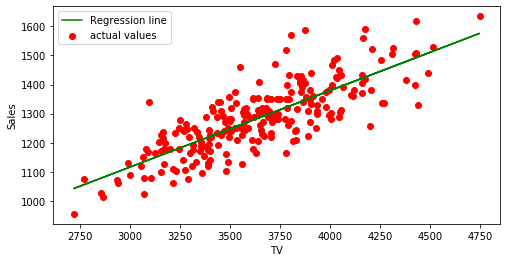

In [63]:
plt.figure(figsize=(8,4))
plt.scatter(data1["Head Size(cm^3)"],data1["Brain Weight(grams)"],c="red",label="actual values")
plt.plot(data1["Head Size(cm^3)"],p,c="green",label="Regression line")
plt.xlabel("Head Size")
plt.ylabel("Brain Weight")
plt.legend(loc="best")
plt.show()

In [64]:
r2=r.score(x2,y2)
r2

0.639311719957

In [69]:
r.intercept_

array([325.57342105])

In [71]:
r.coef_

array([[0.26342934]])